In [171]:
import pandas as pd 
import sklearn,sklearn.tree
import sklearn.metrics as metrics

In [172]:
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
# Drop columns that won't be used in our feature set

df.drop(['Name','Ticket','Cabin','PassengerId'],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [175]:
# Count null values in each column 

df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [176]:
# Encode Sex Feature using pandas .get_dummies() function

df = pd.concat((df,df.Sex.str.get_dummies()),axis=1)
df.drop(['Sex'],axis=1,inplace=True)
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,NaN,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [177]:
# Encode Embarked Feature using onehotencoder from sklearn instead of get_dummies

enc = sklearn.preprocessing.OneHotEncoder() # Initialize encoder
enc.fit(df.iloc[:,[6]]) # Fit encoder with embarked column
onehotlabels = enc.transform(df.iloc[:,[6]]).toarray() # Create array
port = pd.DataFrame({'Cherbourg': onehotlabels[:, 0], 'Queenstown': onehotlabels[:, 1], 'Southhampton': onehotlabels[:, 2]}) # Create dataframe with header and fields from encoder
port.head(5)

,Cherbourg,Queenstown,Southhampton
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [178]:
# Concat new dataframe and drop olded embarked column 

df.drop(['Embarked'],axis=1,inplace=True)

In [179]:
df = pd.concat((df,port),axis=1)
df 

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southhampton
0,0,3,22.0,1,0,7.2500,0,1,0.0,0.0,1.0
1,1,1,38.0,1,0,71.2833,1,0,1.0,0.0,0.0
2,1,3,26.0,0,0,7.9250,1,0,0.0,0.0,1.0
3,1,1,35.0,1,0,53.1000,1,0,0.0,0.0,1.0
4,0,3,35.0,0,0,8.0500,0,1,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0.0,0.0,1.0
887,1,1,19.0,0,0,30.0000,1,0,0.0,0.0,1.0
888,0,3,NaN,1,2,23.4500,1,0,0.0,0.0,1.0
889,1,1,26.0,0,0,30.0000,0,1,1.0,0.0,0.0


In [180]:
# Now let's look at the correlation of our features using a seaborn heatmap

In [181]:
import seaborn as sns 
import matplotlib.pyplot as plt

In [182]:
# Get the correlation coefficient among features using pandas corr function

corr = df.corr()

<AxesSubplot:>

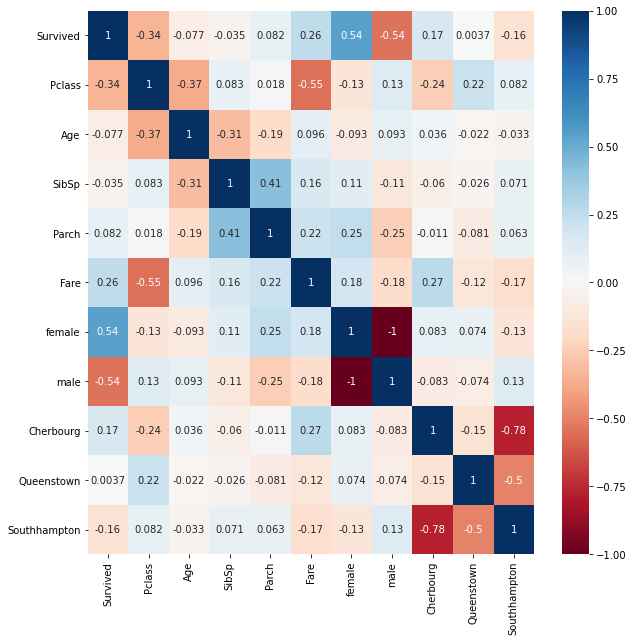

In [183]:
plt.subplots(figsize=(10,10)) # Set figure size of heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", annot=True,)

In [184]:
# Check our null values again 

df.isnull().sum()

Survived          0
Pclass            0
Age             177
SibSp             0
Parch             0
Fare              0
female            0
male              0
Cherbourg         0
Queenstown        0
Southhampton      0
dtype: int64

In [185]:
# Based on the insignificant correlation between age and survived, i think it's best to replace the null values of age with the mean instead of dropping the rows entirely

In [186]:
df.Age.mean()

29.69911764705882

In [187]:
df.Age.median()

28.0

<AxesSubplot:ylabel='Frequency'>

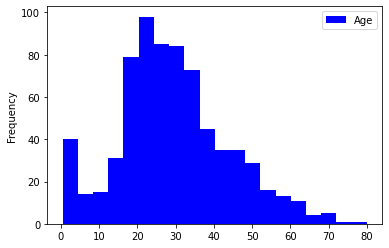

In [188]:
# Plot a histogram of the different ages in our dataframe

df.plot(y = 'Age', kind = 'hist', bins=20, color='blue')

In [189]:
# Replace null age values with mean age 

df.isnull().sum()

Survived          0
Pclass            0
Age             177
SibSp             0
Parch             0
Fare              0
female            0
male              0
Cherbourg         0
Queenstown        0
Southhampton      0
dtype: int64

In [190]:
df['Age'] = df.Age.fillna(df.Age.mean())

In [191]:
df.isnull().sum()

Survived        0
Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
female          0
male            0
Cherbourg       0
Queenstown      0
Southhampton    0
dtype: int64

In [192]:
# Check for duplicate rows 

df.duplicated().sum()

111

In [193]:
# Divide the dataset into survivors and non survivors

survive = df.loc[df.Survived==1]
nonsurvive = df.loc[df.Survived==0]

In [194]:
survive.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southhampton
count,342.0,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000,342.000000
mean,1.0,1.950292,28.549778,0.473684,0.464912,48.395408,0.681287,0.318713,0.271930,0.087719,0.634503
std,0.0,0.863321,13.772498,0.708688,0.771712,66.596998,0.466660,0.466660,0.445606,0.283301,0.482275
min,1.0,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,1.000000,21.000000,0.000000,0.000000,12.475000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,2.000000,29.699118,0.000000,0.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.0,3.000000,35.000000,1.000000,1.000000,57.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,1.0,3.000000,80.000000,4.000000,5.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [195]:
nonsurvive.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male,Cherbourg,Queenstown,Southhampton
count,549.0,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,0.0,2.531876,30.415100,0.553734,0.329690,22.117887,0.147541,0.852459,0.136612,0.085610,0.777778
std,0.0,0.735805,12.457370,1.288399,0.823166,31.388207,0.354968,0.354968,0.343751,0.280043,0.416119
min,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,2.000000,23.000000,0.000000,0.000000,7.854200,0.000000,1.000000,0.000000,0.000000,1.000000
50%,0.0,3.000000,29.699118,0.000000,0.000000,10.500000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,0.0,3.000000,35.000000,1.000000,0.000000,26.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,0.0,3.000000,74.000000,8.000000,6.000000,263.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [196]:
# Some observable patterns can be seen by looking at the mean of both groups, such as: 

# - Survivors tend to have a higher Pclass 
# - Survivors tend to have paid more in Fare 
# - Survivors were mostly female, sex had the strongest correlation with survived among all our features 
# - Sibsp didn't have a significant difference 
# - Parch mean was noticeably higher among the survivers 

# With that being said, let's drop all the different port columns and build a baseline model.

In [197]:
df.drop(['Cherbourg','Queenstown','Southhampton'],axis=1,inplace=True)
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [198]:
# Shuffle our dataframe a couple times before training 

df = df.sample(frac=1)

In [199]:
df.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,female,male
846,0,3,29.699118,8,2,69.5500,0,1
196,0,3,29.699118,0,0,7.7500,0,1
513,1,1,54.000000,1,0,59.4000,1,0
123,1,2,32.500000,0,0,13.0000,1,0
568,0,3,29.699118,0,0,7.2292,0,1


###### DECISION TREE ######

In [200]:
y = df['Survived']
X = df.drop(['Survived'],axis=1)

In [212]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [213]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [214]:
# Fitting Decision Tree Classification to the Training set
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [215]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[121,  11],
       [ 30,  61]], dtype=int64)

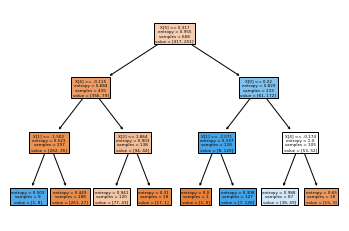

In [216]:
sklearn.tree.plot_tree(classifier, filled=True)
plt.show()

In [217]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.816
Recall: 0.67
Precision: 0.847


In [142]:
X

,Pclass,Age,SibSp,Parch,Fare,female,male
642,3,2.000000,3,2,27.9000,1,0
496,1,54.000000,1,0,78.2667,1,0
800,2,34.000000,0,0,13.0000,0,1
566,3,19.000000,0,0,7.8958,0,1
334,1,29.699118,1,0,133.6500,1,0
...,...,...,...,...,...,...,...
619,2,26.000000,0,0,10.5000,0,1
275,1,63.000000,1,0,77.9583,1,0
870,3,26.000000,0,0,7.8958,0,1
850,3,4.000000,4,2,31.2750,0,1


###### XG BOOST ###### 

In [144]:
pip install --upgrade xgboost

In [145]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [146]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[115,  19],
       [ 27,  62]], dtype=int64)

In [147]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.794
Recall: 0.697
Precision: 0.765


###### Random Forest ###### 

In [148]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_depth = 4,criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10,
                       random_state=0)

In [149]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[123,  11],
       [ 26,  63]], dtype=int64)

In [150]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.834
Recall: 0.708
Precision: 0.851


###### SVM (Supported Vector Machine) ######

In [151]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [152]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[116,  18],
       [ 23,  66]], dtype=int64)

In [154]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.816
Recall: 0.742
Precision: 0.786


In [ ]:
# The Decision Tree gave the best relates among the XGBoost, SVM, and Random Forest. Therefore we will use a three layered decision tree for our final predictions 

In [159]:
# Import and prep test data

test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [161]:
test.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
test

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,34.5,0,0,7.8292
1,3,female,47.0,1,0,7.0000
2,2,male,62.0,0,0,9.6875
3,3,male,27.0,0,0,8.6625
4,3,female,22.0,1,1,12.2875
...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500
414,1,female,39.0,0,0,108.9000
415,3,male,38.5,0,0,7.2500
416,3,male,NaN,0,0,8.0500


In [163]:
# Encode Sex Feature using pandas .get_dummies() function

test = pd.concat((test,test.Sex.str.get_dummies()),axis=1)
test.drop(['Sex'],axis=1,inplace=True)
test

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,34.5,0,0,7.8292,0,1
1,3,47.0,1,0,7.0000,1,0
2,2,62.0,0,0,9.6875,0,1
3,3,27.0,0,0,8.6625,0,1
4,3,22.0,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,0,1
414,1,39.0,0,0,108.9000,1,0
415,3,38.5,0,0,7.2500,0,1
416,3,NaN,0,0,8.0500,0,1


In [164]:
test.isnull().sum()

Pclass     0
Age       86
SibSp      0
Parch      0
Fare       1
female     0
male       0
dtype: int64

In [166]:
# Fill in null age and fare values with mean 

test['Age'] = test.Age.fillna(df.Age.mean())

In [168]:
test['Fare'] = test.Fare.fillna(df.Fare.mean())

In [169]:
test.isnull().sum()

Pclass    0
Age       0
SibSp     0
Parch     0
Fare      0
female    0
male      0
dtype: int64

In [170]:
test.dtypes

Pclass      int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
female      int64
male        int64
dtype: object

In [228]:
test

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,34.500000,0,0,7.8292,0,1
1,3,47.000000,1,0,7.0000,1,0
2,2,62.000000,0,0,9.6875,0,1
3,3,27.000000,0,0,8.6625,0,1
4,3,22.000000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,0,1
414,1,39.000000,0,0,108.9000,1,0
415,3,38.500000,0,0,7.2500,0,1
416,3,29.699118,0,0,8.0500,0,1


In [256]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [257]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [258]:
# Fitting Decision Tree Classification to the Training set
classifier = sklearn.tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 100, max_depth=3)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [259]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[121,  11],
       [ 30,  61]], dtype=int64)

In [260]:
accuracy = metrics.accuracy_score(y_test,y_pred).round(3)
recall = metrics.recall_score(y_test,y_pred).round(3)
precision = metrics.precision_score(y_test,y_pred).round(3)
print(f"Accuracy Score: {accuracy}\nRecall: {recall}\nPrecision: {precision}")

Accuracy Score: 0.816
Recall: 0.67
Precision: 0.847


In [261]:
test

,Pclass,Age,SibSp,Parch,Fare,female,male
0,3,34.500000,0,0,7.8292,0,1
1,3,47.000000,1,0,7.0000,1,0
2,2,62.000000,0,0,9.6875,0,1
3,3,27.000000,0,0,8.6625,0,1
4,3,22.000000,1,1,12.2875,1,0
...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,0,1
414,1,39.000000,0,0,108.9000,1,0
415,3,38.500000,0,0,7.2500,0,1
416,3,29.699118,0,0,8.0500,0,1


In [262]:
# Predicting the Test set results

final_test = sc.transform(test)

In [263]:
y_pred = classifier.predict(final_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [268]:
test['Survived'] = y_pred

In [269]:
test

,Pclass,Age,SibSp,Parch,Fare,female,male,Survived
0,3,34.500000,0,0,7.8292,0,1,0
1,3,47.000000,1,0,7.0000,1,0,1
2,2,62.000000,0,0,9.6875,0,1,0
3,3,27.000000,0,0,8.6625,0,1,0
4,3,22.000000,1,1,12.2875,1,0,1
...,...,...,...,...,...,...,...,...
413,3,29.699118,0,0,8.0500,0,1,0
414,1,39.000000,0,0,108.9000,1,0,1
415,3,38.500000,0,0,7.2500,0,1,0
416,3,29.699118,0,0,8.0500,0,1,0


In [266]:
holder = pd.read_csv('test.csv')
holder

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [270]:
results = pd.concat((holder['PassengerId'],test.Survived),axis=1)
results

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [271]:
results.to_csv('gender_submission.csv', index=False)